# MODEL DEPLOYEMENT

## **QUESTION :**  
### Which characteristics has the impact on the prices of the cars?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [5]:
df=pd.read_csv(path)

In [6]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [7]:
#import LinearRegression Model
from sklearn.linear_model import LinearRegression

In [8]:
#create LinearRegression Object
lm=LinearRegression()
lm

LinearRegression()

In [9]:
x=df[["highway-mpg"]]
y=df["price"]

In [10]:
#fit values in LinearRegression Model
lm.fit(x,y)

LinearRegression()

In [11]:
yhat=lm.predict(x)
yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [12]:
lm.intercept_

38423.305858157386

In [13]:
lm.coef_

array([-821.73337832])

In [14]:
#Price=38423.305+(-821.733)*horsepower-mpg
yhat=38423.305+(-821.733)*x
yhat[0:5]

,highway-mpg
0,16236.514
1,16236.514
2,17058.247
3,13771.315
4,20345.179


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 48154.35780819025)

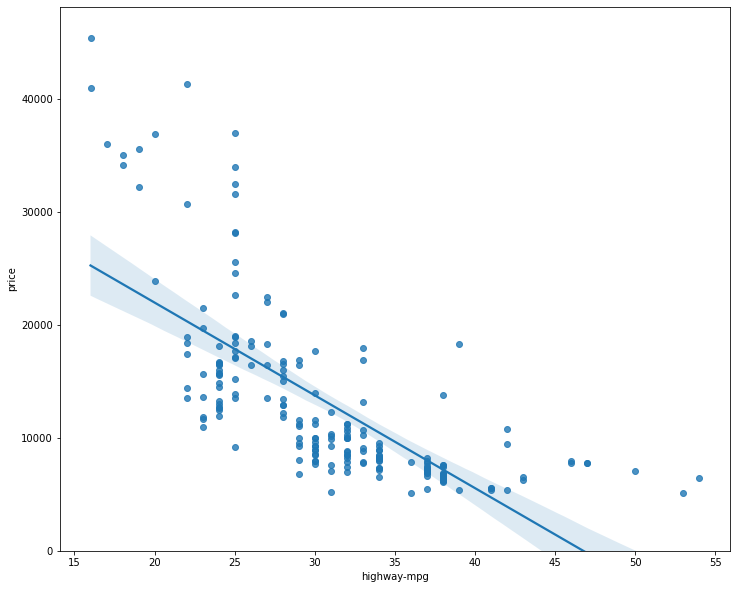

In [16]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

From this plot, the price is negatively correlated with highway-mpg since the regression plot is negative.

In [17]:
df[["highway-mpg","price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [18]:
#Relation between engine-seze and prices
x=df[["engine-size"]]
y=df["price"]

lm.fit(x,y)

yhat1=lm.predict(x)
yhat1[0:5]


array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [19]:
lm.intercept_

-7963.338906281049

In [20]:
lm.coef_

array([166.86001569])

In [21]:
yhat=-7963.338+166.860*x
yhat[0:5]

,engine-size
0,13728.462
1,13728.462
2,17399.382
3,10224.402
4,14729.622


(0.0, 53277.56695199737)

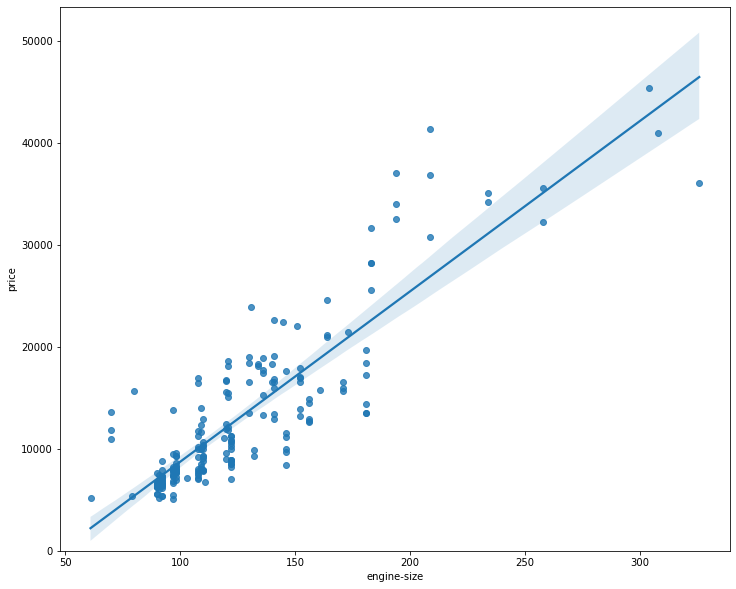

In [22]:
plt.figure(figsize=(width,height))
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

Here from the above plot, the engine-size data has a  strong positive relation with the prices of cars. The prices is increases with increasing in engine-size 

In [23]:
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### However, Using Multiple Linear Regression we can find the correlation between different columns

In [24]:
z=df[["horsepower","curb-weight","highway-mpg","engine-size"]]
y=df["price"]

lm.fit(z,y)

LinearRegression()

In [25]:
yhat2=lm.predict(z)
yhat2[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [26]:
lm.intercept_

-15806.624626329205

In [27]:
lm.coef_

array([53.49574423,  4.70770099, 36.05748882, 81.53026382])

In [28]:
df[["horsepower","curb-weight","highway-mpg","engine-size","price"]].corr()

,horsepower,curb-weight,highway-mpg,engine-size,price
horsepower,1.000000,0.757976,-0.804575,0.822676,0.809575
curb-weight,0.757976,1.000000,-0.794889,0.849072,0.834415
highway-mpg,-0.804575,-0.794889,1.000000,-0.679571,-0.704692
engine-size,0.822676,0.849072,-0.679571,1.000000,0.872335
price,0.809575,0.834415,-0.704692,0.872335,1.000000


(0.0, 47538.76963046889)

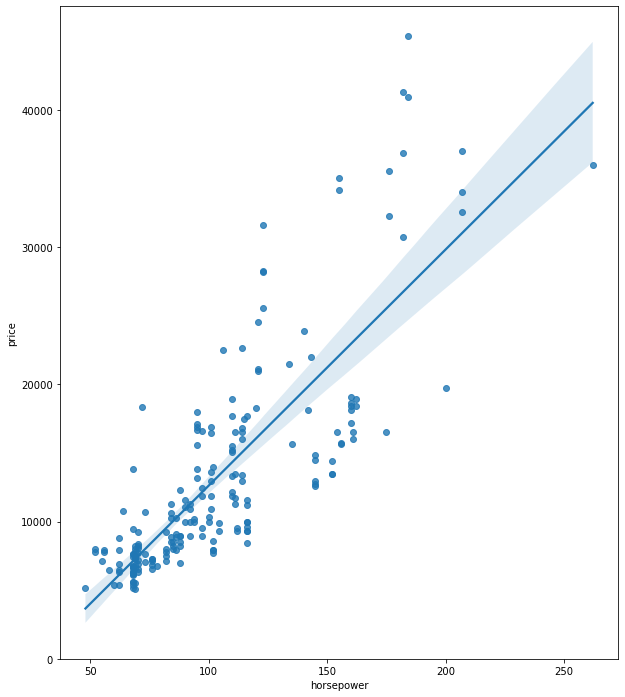

In [29]:
width=10
height=12
plt.figure(figsize=(width,height))
sns.regplot(x="horsepower",y="price",data=df)
plt.ylim(0,)

Shows positive correlation, as prices of car increases with increases in horsepower

(0.0, 47753.9981263326)

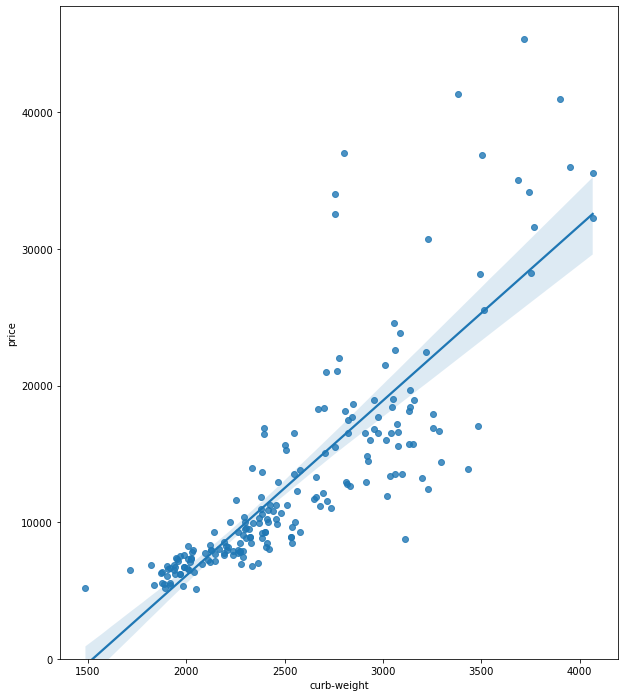

In [30]:
plt.figure(figsize=(width,height))
sns.regplot(x="curb-weight",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

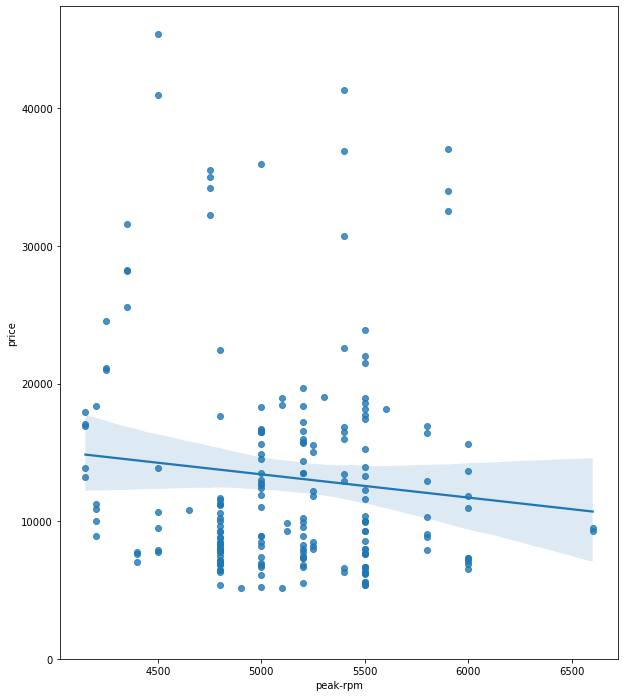

In [31]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm",y="price",data=df)
plt.ylim(0,)

In [32]:
df[["peak-rpm","price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### To visulaize the variance of the data, Residual Plot is the best choice.

C:\Users\visha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

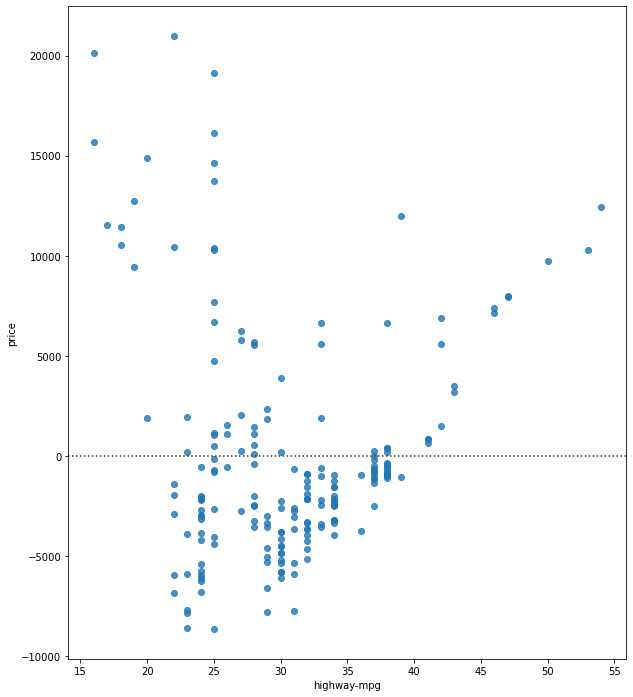

In [33]:
width=10
height=12
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])


<AxesSubplot:xlabel='horsepower', ylabel='price'>

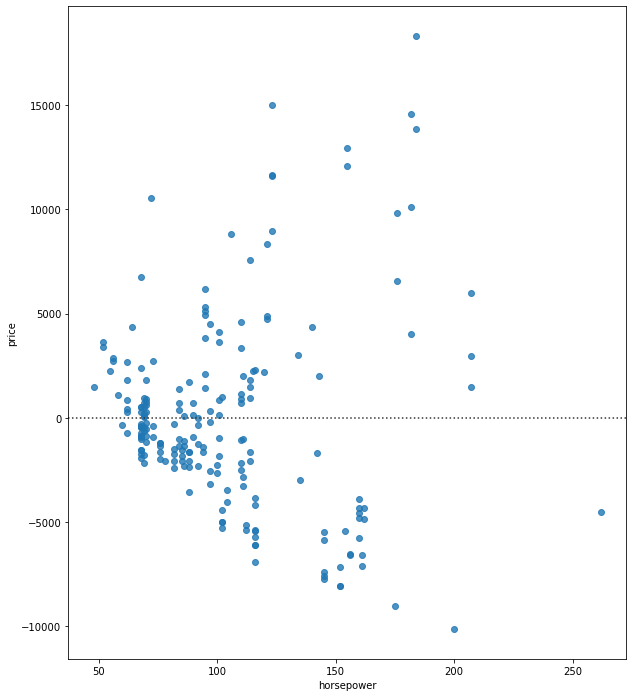

In [34]:
plt.figure(figsize=(width,height))
sns.residplot(df['horsepower'],df['price'])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

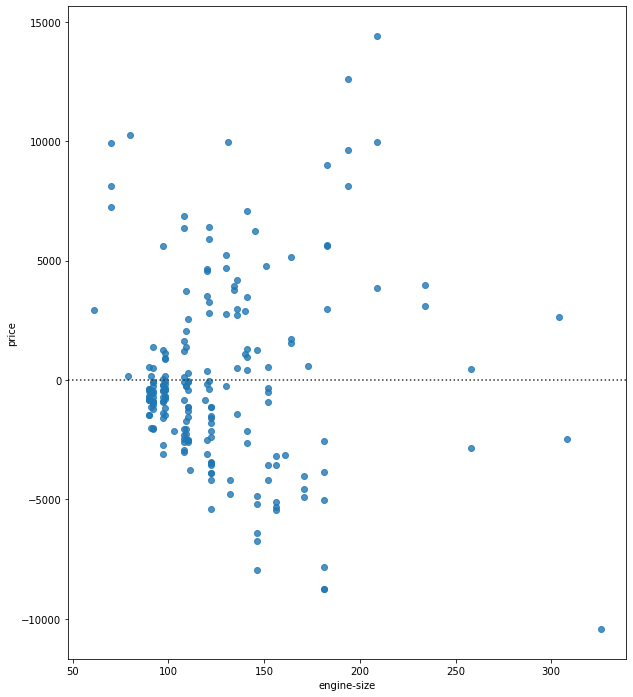

In [35]:
plt.figure(figsize=(width,height))
sns.residplot(df['engine-size'],df['price'])

<AxesSubplot:xlabel='curb-weight', ylabel='price'>

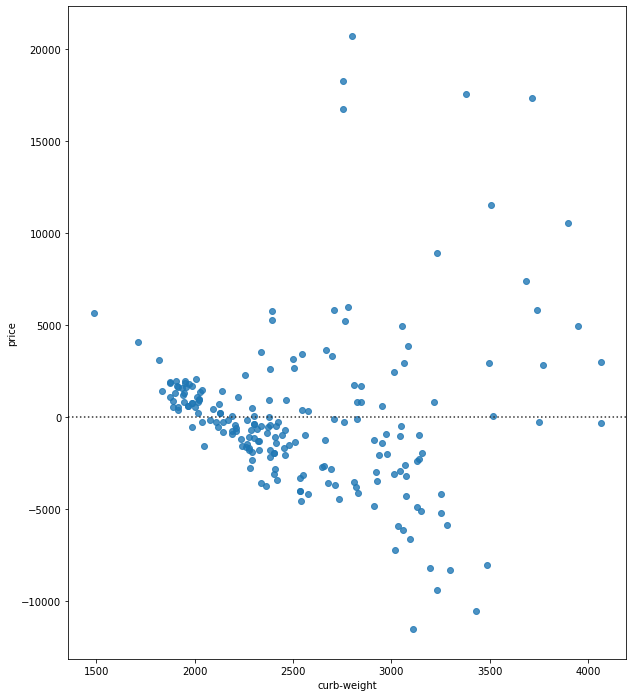

In [36]:
plt.figure(figsize=(width,height))
sns.residplot(df['curb-weight'],df['price'])

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

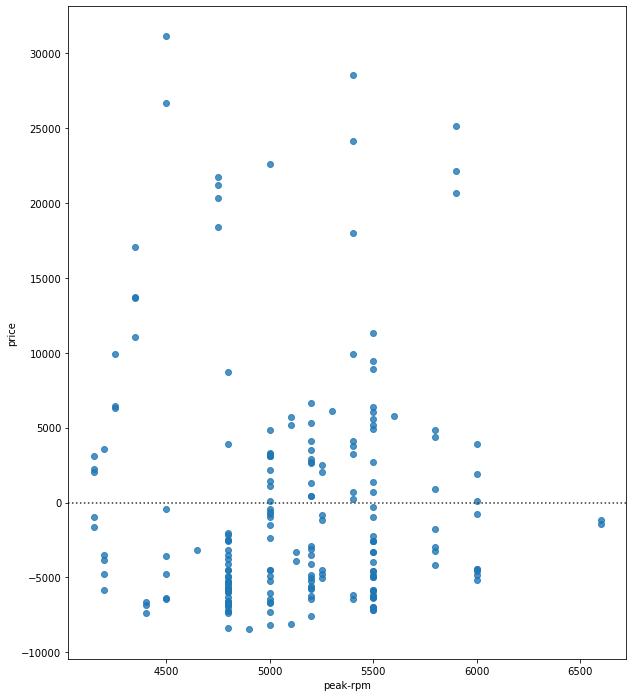

In [37]:
plt.figure(figsize=(width,height))
sns.residplot(df['peak-rpm'],df['price'])

In [38]:
yhat=lm.predict(z)

In [39]:
yhat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

C:\Users\visha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\visha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


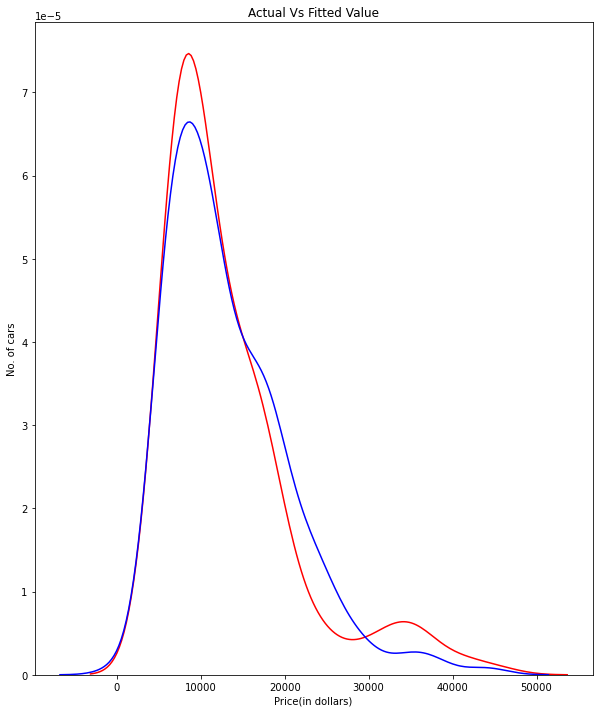

In [40]:
plt.figure(figsize=(width,height))

ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Value')
sns.distplot(yhat,hist=False,color='b',label="Fitted Value",ax=ax1)

plt.title("Actual Vs Fitted Value")
plt.xlabel("Price(in dollars)")
plt.ylabel("No. of cars")

plt.show()
plt.close()

Here the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [41]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [42]:
x=df['highway-mpg']
y=df['price']

In [43]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


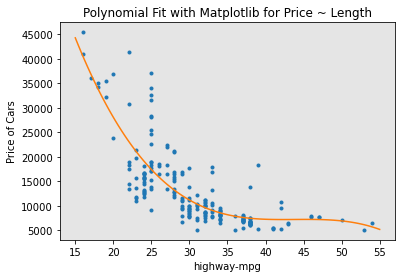

In [44]:
PlotPolly(p,x,y,'highway-mpg')

In [45]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [46]:
f=np.polyfit(x,y,11)
p=np.poly1d(f)
print(p)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


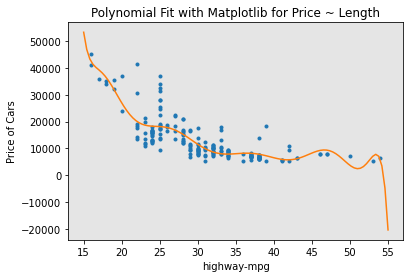

In [47]:
PlotPolly(p,x,y,'highway-mpg')

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
pr=PolynomialFeatures(degree=2)

In [50]:
z_pr=pr.fit_transform(z)

In [51]:
z.shape

(201, 4)

In [52]:
z_pr.shape

(201, 15)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [54]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [55]:
pipe=Pipeline(Input)

In [56]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [57]:
z=z.astype(float)

In [58]:
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [59]:
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [60]:
#find R-Squared
lm.score(z,y)

0.8093562806577458

In [61]:
#highway_mpg_fit
from sklearn.linear_model import LinearRegression

x=df[['highway-mpg']]
y=df['price']

lm=LinearRegression()

lm.fit(x,y)

yhat=lm.predict(x)
yhat[0:3]

# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339175


In [62]:
yhat=lm.predict(x)
yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


In [65]:
# fit the model 
lm.fit(z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(z, df['price']))

The R-square is:  0.8093562806577458


In [66]:
Y_predict_multifit = lm.predict(z)

In [67]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726489


In [68]:
#POLYNOMIAL FIT
from sklearn.metrics import r2_score

In [69]:
r_squared=r2_score(y,p(x))
print("The R-Square value is:",r_squared)

The R-Square value is: 0.702376908737018


In [70]:
#Mean Squared Error
mean_squared_error(df['price'],p(x))

18703127.67098826

### Now i used predict method to produce a prediction by importing pyplot for plotting.

In [71]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [72]:
input=np.arange(1,100,1).reshape(-1,1)

In [73]:
#fit the model
lm.fit(x,y)

LinearRegression()

In [74]:
yhat=lm.predict(input)

In [76]:
yhat[0:4]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487])

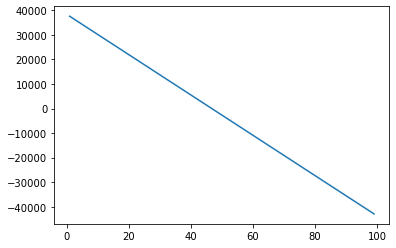

In [78]:
plt.plot(input,yhat)
plt.show()

# CONCLUSION

Here, i performed three models: (1) Simple Linear Regression (2) Multiple Linear Regression (3) Polynomial Model.

However, the model which has lower Mean Squared Error and higher R-Squared value best fit for predicting the prices of cars, especially in this dataset.

Therefore, according to the above statement, the MSE value for Simple Linear Regression model is 31635042.9446 and R-squared value is 0.4965911, which is smaller than R-squared of Multiple Linear regression:

MSE - 11980366.8707
R-square - 0.8093562

Polynomial Regression has values are:

MSE - 18703127.6709
R-Square - 0.702376908

Overall, from the above values, Multiple Linear Regression model is the best fit for this dataset, as it has Lowest MSE value as compared to other two models and Highest R-square value.